
<h1 align=center><font size = 69>Data Analysis with Python</font></h1>

# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

The analysis will require the following libraries: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets 

 Load the csv:  

In [2]:
file_name="King_County_House_Sales.csv"
df=pd.read_csv(file_name)


We use the method <code>head</code> to display the first 5 columns of the dataframe.

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1 
Display the data types of each column:

In [4]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.

In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling

### Question 2 
Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code>, then obtain a new statistical summary of the data.

In [6]:
df.drop(["id","Unnamed: 0"], axis=1, inplace=True)
df.describe()

,Unnamed: 0.1,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>

In [11]:
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0



We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>.

In [12]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. 

In [13]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [14]:
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis

### Question 3
Count the number of houses with unique floor values and convert it to a dataframe.

In [15]:
df_floor_counts = df["floors"].value_counts().to_frame()
df_floor_counts.rename(columns={"floors":"value_counts"}, inplace = True)
df_floor_counts.index.name = "floors"
df_floor_counts

,value_counts
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4
Determine whether houses with a waterfront view or without a waterfront view have more price outliers, using plot.

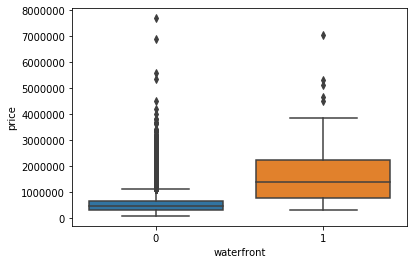

In [16]:
sns.boxplot(x="waterfront",y="price", data=df)

### Question 5
Determine if the feature <code>sqft_above</code> is negatively or positively correlated with price, using plot.

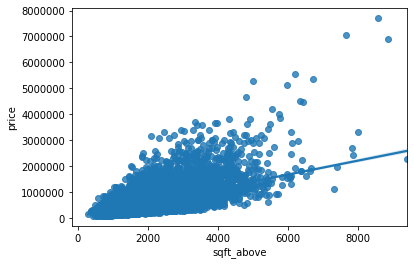

In [17]:
sns.regplot(x="sqft_above",y="price",data=df)


We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.

In [18]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
Unnamed: 0.1     0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.

In [19]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Question  6
Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2.

In [20]:
X1 = df[["sqft_living"]]
Y1 = df["price"]
lm1 = LinearRegression()
lm1.fit(X1,Y1)
lm1.score(X1,Y1)

0.49285321790379316

### Question 7
Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [21]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15",
           "sqft_above","grade","sqft_living"]     

Then calculate the R^2.

In [22]:
lm.fit(df[features],df["price"])
lm.score(df[features],df["price"])

0.6576947760389991

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor 

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [23]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [24]:
pipe = Pipeline(Input)
pipe.fit(df[features],df["price"])

r = pipe.score(df[features],df["price"])
print("The R-square value is: ", r)

The R-square value is:  0.7513425038014504


# Module 5: Model Evaluation and Refinement

Import the necessary modules:

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("Done")

Done


We will split the data into training and testing sets:

In [28]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("Number of test samples:", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples: 3242
Number of training samples: 18371


### Question 9
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 


In [29]:
from sklearn.linear_model import Ridge

In [30]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
r_square = RidgeModel.score(x_test,y_test)
print("The R-square value is: ", r_square)

The R-square value is:  0.6478759163939116


### Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [32]:
p2 = PolynomialFeatures(degree=2)
x_train_p2= p2.fit_transform(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])
x_test_p2 = p2.fit_transform(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

RidgeModel2 = Ridge(alpha=0.1)
RidgeModel2.fit(x_train_p2,y_train)
r2 = RidgeModel2.score(x_test_p2,y_test)

print("The R-square value is: ",r2)

The R-square value is:  0.7002744275672729
